# Madhav Real Estates - House Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284120,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704611,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# For plotting histograms
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [9]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in Train Set: {len(train_set)}\nRows in Test Set: {len(test_set)}")

* Above work can also be done using sklearn in a simple way

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in Train Set: {len(train_set)}\nRows in Test Set: {len(test_set)}")

Rows in Train Set: 404
Rows in Test Set: 102


> But, it maybe possible that all the 35 datapoints which has 'CHAS' as '1' may go to the test_set, and if all those datapoints which has 'CHAS' as '1' will go to test_set, then our model will never come to know that 'CHAS' exists as '1' too. Because, during training model will face only 'CHAS' as '0', if all 'CHAS' with '1' goes to test_set.

> So, we need both 'CHAS' as '0' and 'CHAS' as '1' in the training_set, so that our model will come to know both/all types of 'CHAS'. This will reduce error and will improve the accuracy.

> For that, we can use 'Stratified Sampling'.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
# 95/7

In [17]:
# 376/28

In [18]:
housing = strat_train_set.copy()

## Looking for Correlations

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679014
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235D9FD0748>,
      dtype=object)

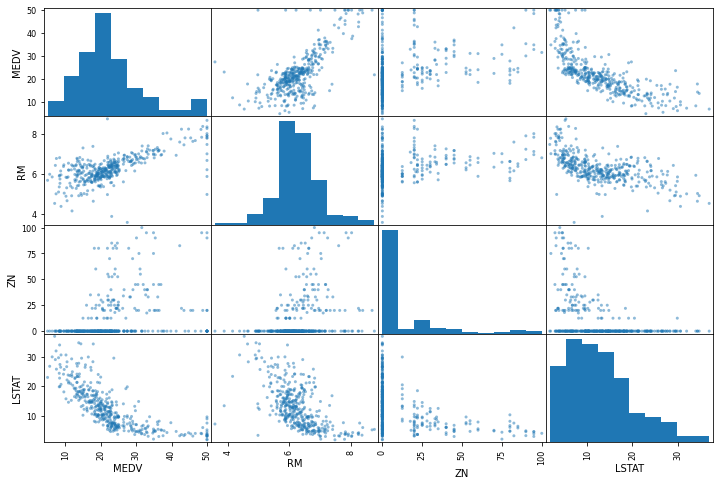

In [21]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize = (12,8))

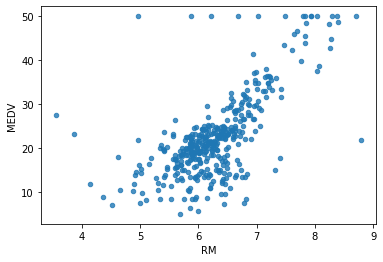

In [22]:
housing.plot(kind="scatter", x='RM', y='MEDV', alpha = 0.8)

## Trying out Attribute Combination

In [23]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


>'TAXRM' is added in the dataframe

> Let's combine 'TAXRM' with 'MEDV', and then see that how do value of 'TAXRM' affects 'MEDV'

In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679014
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525385
LSTAT     -0.740494
Name: MEDV, dtype: float64

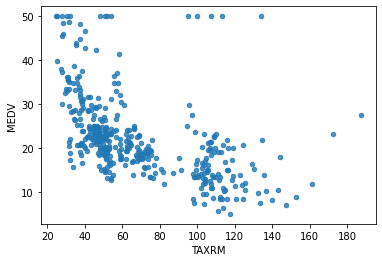

In [26]:
housing.plot(kind="scatter", x='TAXRM', y='MEDV', alpha = 0.8)

> We can see that 'TAXRM' affects hugely on our 'MEDV'.

* In RM with MEDV plot and in TAXRM with MEDV plot, we saw outliers. 
> Outliers are the datapoints which can increase error and reduce accuracy.
> For e.g. in RM vs MEDV, we have MEDV = 50 at both RM=5 and RM=9, which is kind of not possible and may , mislead our model and reduce it accuracy.
> So, we can remove that RM=5 datapoint and such other datapoints from our dataset to increase our model's accuracy.
>
> E.g.2: In TAXRM vs MEDV, we have MEDV=50 for TAXRM=25 and TAXRM=130 as well.
    > And we know using correlation and sort values, that as TAXRM increases, MEDV decreases.
    > So, MEDV=50, is kind of wrong for TAXRM=100 or 130. So, we can remove such outliers (datapoints), which may mislead our model.

* Let's randomly delete 5 values from 'RM' attribute, so that we can learn that how to handle 'Missing Attributes'

In [27]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## Missing Attributes

>To take care of the missing data, we have 3 options:<br/>
    >1) Remove the complete row of missing datapoints.<br/>
    >2) Remove that complete attribute, which have any missing value. (Worst Idea it is)<br/>
    >3) Set the missing value to some value(0, mean or median).

> Deleted 5 values randomly from the 'RM' attribute

In [28]:
# Option 1
a = housing.dropna(subset=["RM"])
a.shape
# Note that the original housing dataframe will remain unchanged cause we haven't used 'inplace=True'.

(400, 13)

In [29]:
# Option 2
housing.drop('RM', axis=1).shape
# Note that there is no 'RM' column in the Dataframe and also note that the original housing dataframe remains unchanged, cause we haven't used 'inplace=True'.

(404, 12)

In [30]:
# Option 3
# Compute median for option 3
median = housing["RM"].median()

In [31]:
# median

In [32]:
# Option 3
housing["RM"].fillna(median)
# Note that the original housing dataframe will remain unchanged cause we haven't used 'inplace=True'.

254    6.1080
348    6.6350
476    6.4840
321    6.3760
326    6.3120
        ...  
155    6.2125
423    6.1030
98     7.8200
455    6.5250
216    5.8880
Name: RM, Length: 404, dtype: float64

In [33]:
housing.shape

(404, 13)

> Filling empty cells with median value, using sklearn

In [34]:
housing.describe()          # Before we started filling missing attributes.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278457,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714833,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.212500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [36]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21250e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [37]:
imputer.statistics_.shape

(13,)

In [38]:
X = imputer.transform(housing)

In [39]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277804,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711307,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.212500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

Primarily, three types of objects:

1) Estimators - It estimates some parameter based on the dataset. Eg. Imputer.
                 It has a fit method and a transform method.
                 
2) Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform(), which fits and then transforms.

3) Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() functions which will evaluate the predictions.

## Feature Scaling

Primarily, there are 2 types of feature scaling methods:
1. Min-Max Scaling (Normalization)
        (Value - Min)/(Max - Min)
        sklearn provides a class called MinMaxScaler for this.
2. Standardization - (Best to use)
        (Value - mean)/std
        sklearn provides a class called StandardScaler for this.

## Creating a Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ......add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [42]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [44]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for MADHAV Real Estates

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
some_data = housing.iloc[:5]

In [47]:
some_labels = housing_labels.iloc[:5]

In [48]:
prepared_data = my_pipeline.transform(some_data)

In [49]:
model.predict(prepared_data)

array([22.516, 25.991, 16.776, 23.267, 23.547])

In [50]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [52]:
rmse

1.2182523454636651

> We do not consider this as a good thing. This is a high error. Now, suppose we want to try another model, simply go upwards and change it to let's say DecisionTreeRegressor.

> On using DecisionTreeRegressor, we got '0' error. 

> Wait!! Don't get happy, it's because it has overfitted data.

> It has learned the Training Data very well.

> Overfitting!!

## Using better Evaluation Technique - Cross Validation

In [53]:
# Divide the training data into say 10 groups
# 1 2 3 4 5 6 7 8 9 10
# Train the model using '2 to 10' and use '1' for test.
# Then, train the model using '1' and '3 to 10' and use '2' for test.
# Repeat similiarly 10 times.

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [55]:
rmse_scores

array([2.8580405 , 2.97501445, 4.51988171, 2.84778661, 3.40962309,
       2.5401496 , 4.79327093, 3.29592473, 3.19806978, 3.42270981])

* OKAY!!! Here, we can see that "DecisionTreeregressor" isn't overfitting, whereas it is giving better results than 'LinearRegression'.
* We can try 'Cross Validation' by using 'LinearRegression' and see whether we're getting less error than 'DecisionTreeRegressor' or not.
* On trying 'Cross Validation' over 'LinearRegression' that we're getting better results (less errors) in 'DecisionTreeRegressor'.
* Therefore, we'll use 'DecisionTreeRegressor'.
* Later on, tried RandomForestRegressor, that came out to be the Best.

In [56]:
def print_scores(scores):
    print('Score :', scores)
    print('Mean :', scores.mean())
    print('Standard Deviation :', scores.std())

In [57]:
print_scores(rmse_scores)

Score : [2.8580405  2.97501445 4.51988171 2.84778661 3.40962309 2.5401496
 4.79327093 3.29592473 3.19806978 3.42270981]
Mean : 3.386047120179564
Standard Deviation : 0.6902335171196682


# RandomForestRegressor is our best model. MADHAV Real Estates can trust on it for house price predictions from now onwards.

> Next Step: Convert this notebook to a python file and run the pipeline using some IDE.

* We can save our model using 'joblib'

## Saving the Model

In [58]:
from joblib import dump,load
dump(model, 'Madhav.joblib')

['Madhav.joblib']

## Testing the Model on Test Data

In [59]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [60]:
final_rmse

2.913376837630039

> This is not bad. This is less error. It's Awesome!!

## Using the Model

In [61]:
import numpy as np
from joblib import load,dump
model = load('Madhav.joblib')
features = np.array([[-0.43942006,  7.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23901782, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.544])

# Hurray!! Project Completed.